
# **Wine Quality Analysis**

---


In [3]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [5]:
df = pd.read_csv("WineQT.csv")

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [6]:
# Dropping the 'Id' column as it is not useful for analysis
df.drop(columns=["Id"], inplace=True)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
print("\nDataset Information: \n")
df.info()

print("\nSummary Statistics: \n")
display(df.describe().T)

print("\nChecking for missing values: \n")
display(df.isnull().sum())


Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB

Summary Statistics: 



,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000



Checking for missing values: 



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## **Univariate Analysis**

---


In [8]:
print("Unique values in 'quality':", df["quality"].unique())

print("\nQuality Value Counts:")
display(df["quality"].value_counts())


Unique values in 'quality': [5 6 7 4 8 3]

Quality Value Counts:


5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

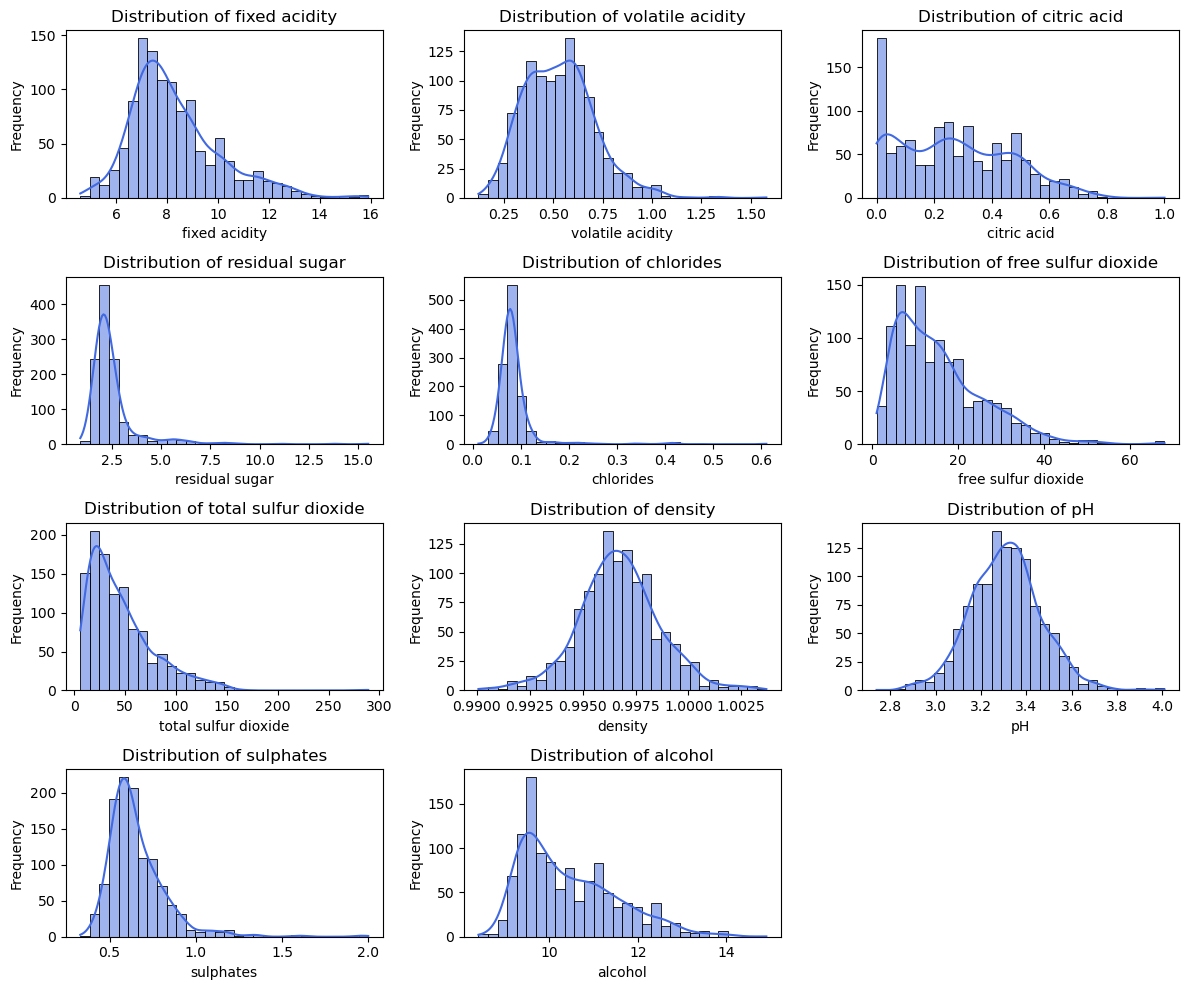

In [9]:
#Histogram for numerical features (Distribution Analysis)
numeric_features = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
numeric_features.remove("quality")  # Exclude 'quality' as it's categorical

plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color="royalblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


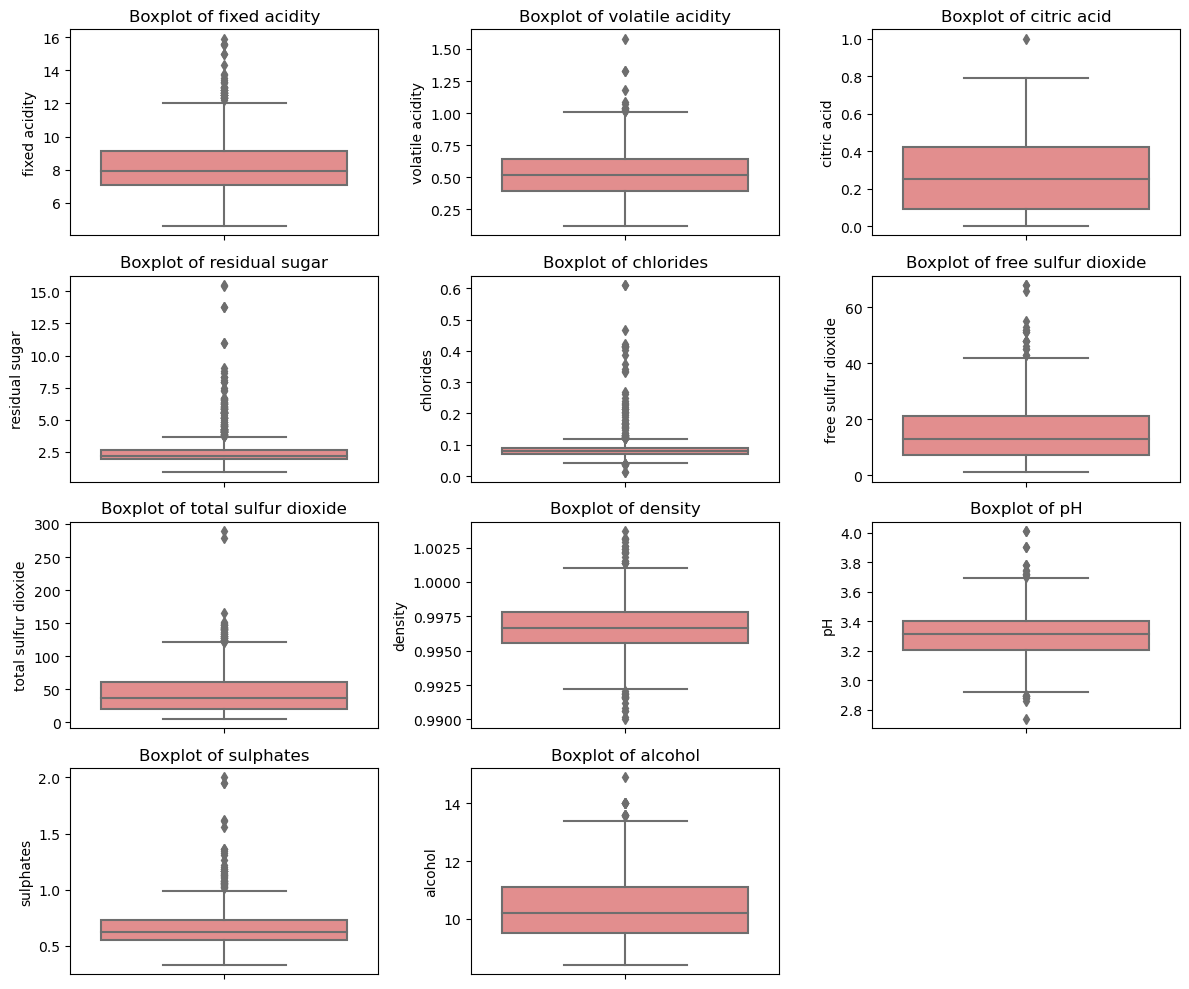

In [10]:
# Boxplot for Outlier Detection
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col], color="lightcoral")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()



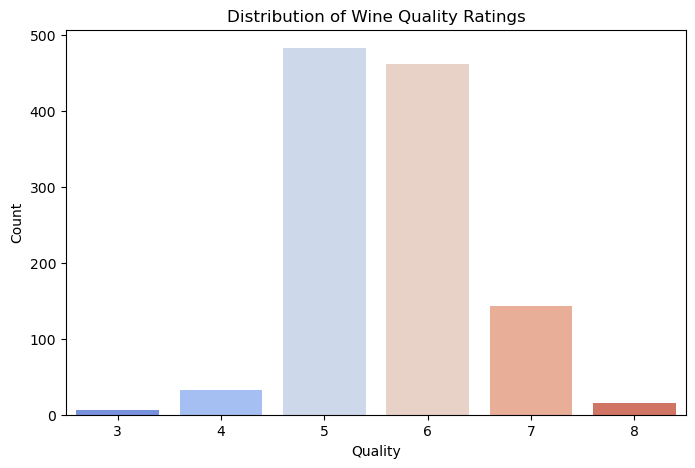

In [11]:
#Count plot for 'quality' (Categorical Feature)
plt.figure(figsize=(8, 5))
sns.countplot(x=df["quality"], palette="coolwarm")
plt.title("Distribution of Wine Quality Ratings")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()


In [12]:
#Calculate Median and Mode
median_values = df.median()
mode_values = df.mode().iloc[0]  # Mode can have multiple values, we take the first one

summary_stats = pd.DataFrame({"Median": median_values, "Mode": mode_values})
print("Median and Mode of Numerical Features:")
display(summary_stats)


Median and Mode of Numerical Features:


,Median,Mode
fixed acidity,7.90000,7.2000
volatile acidity,0.52000,0.5000
citric acid,0.25000,0.0000
residual sugar,2.20000,2.0000
chlorides,0.07900,0.0800
free sulfur dioxide,13.00000,6.0000
total sulfur dioxide,37.00000,28.0000
density,0.99668,0.9976
pH,3.31000,3.3000
sulphates,0.62000,0.6000



### **Summary of Univariate Analysis**
- Most features follow a normal or slightly skewed distribution.
- Alcohol and sulphates have a wider spread, impacting wine quality significantly.
- pH levels are mostly neutral, with fewer extreme values.



## **Bivariate Analysis**



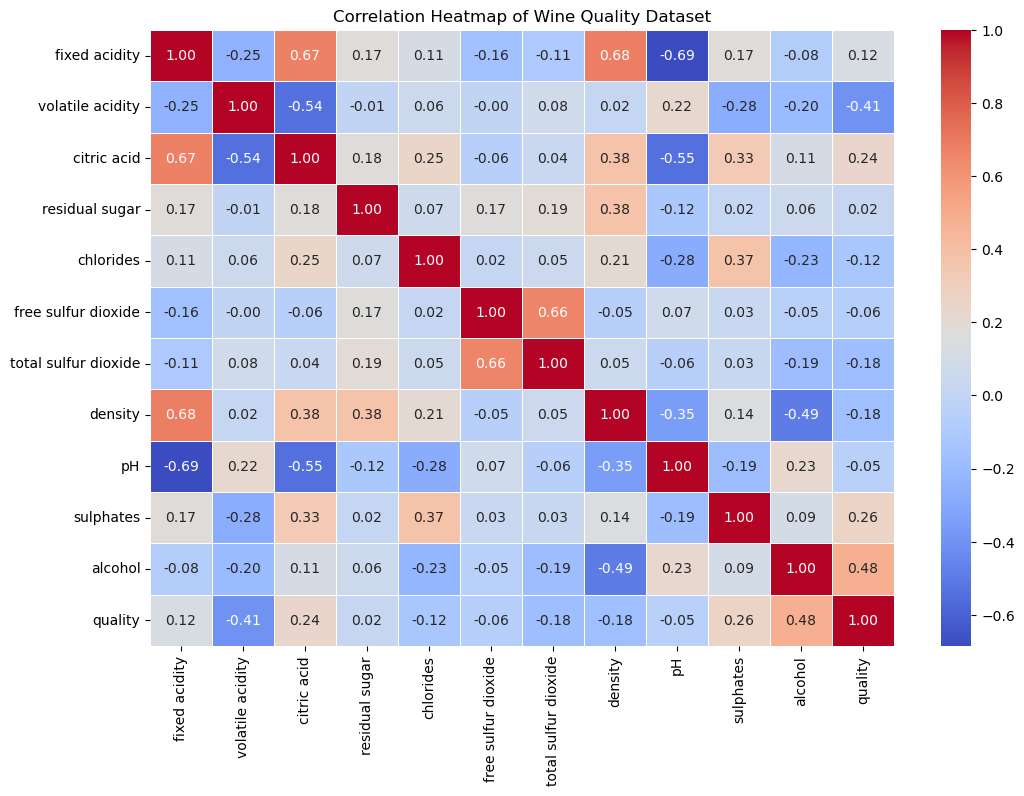

In [13]:
# correlation matrix and heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap of Wine Quality Dataset")
plt.show()


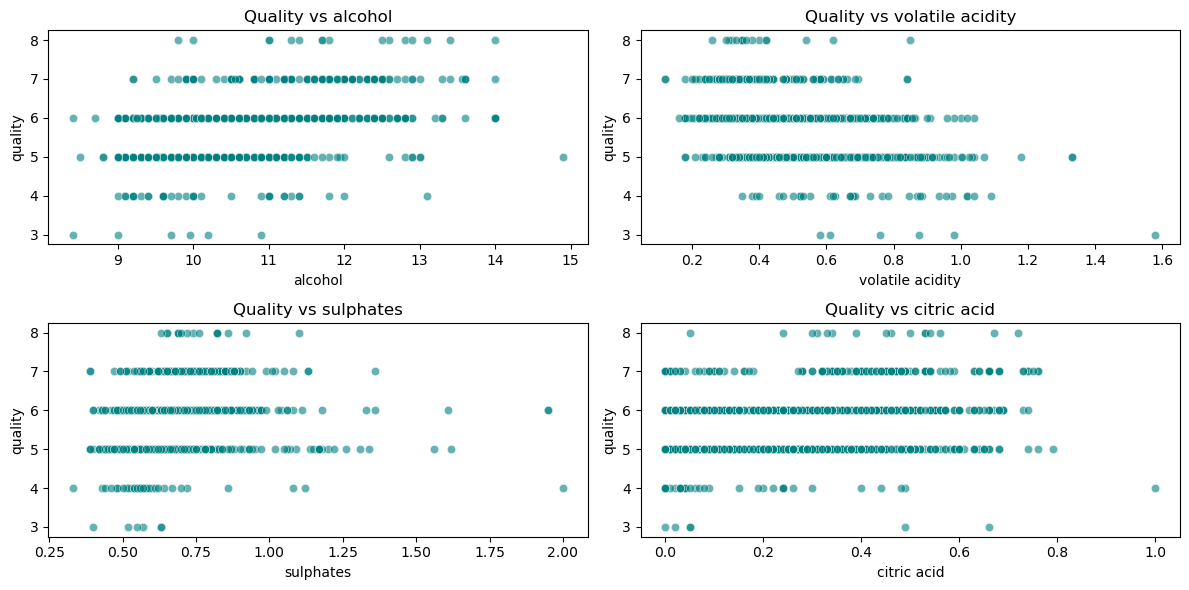

In [14]:
#Scatter Plots for Highly Correlated Features
high_corr_features = correlation_matrix["quality"].abs().sort_values(ascending=False)[1:5].index.tolist()

plt.figure(figsize=(12, 6))
for i, col in enumerate(high_corr_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[col], y=df["quality"], color="teal", alpha=0.6)
    plt.title(f"Quality vs {col}")
plt.tight_layout()
plt.show()


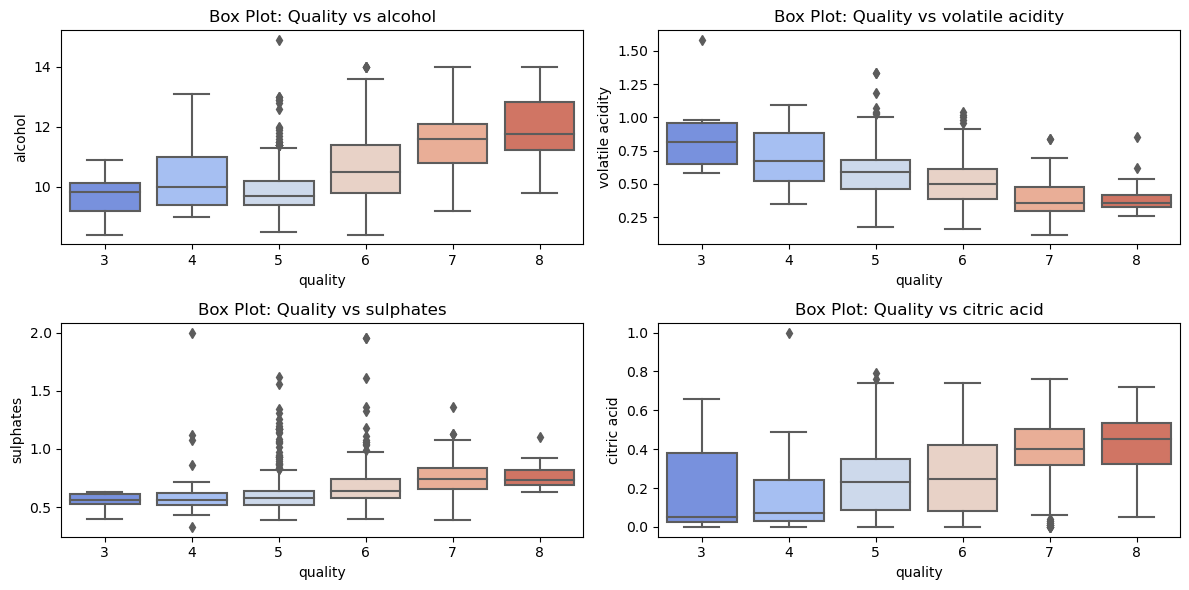

In [15]:

# Box Plot for Categorical Variable 'quality' against High Correlation Features
plt.figure(figsize=(12, 6))
high_corr_features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

for i, col in enumerate(high_corr_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df["quality"], y=df[col], palette="coolwarm")
    plt.title(f"Box Plot: Quality vs {col}")

plt.tight_layout()
plt.show()


In [16]:
#Statistical Tests - Checking Dependency Between 'quality' and Other Features
stat_results = {}
for col in numeric_features:
    stat, p_value = stats.spearmanr(df[col], df["quality"])
    stat_results[col] = p_value

stat_df = pd.DataFrame(stat_results.items(), columns=["Feature", "P-Value"])
stat_df["Significance"] = stat_df["P-Value"].apply(lambda x: "Significant" if x < 0.05 else "Not Significant")
display(stat_df)


,Feature,P-Value,Significance
0,fixed acidity,4.349526e-04,Significant
1,volatile acidity,1.241272e-44,Significant
2,citric acid,2.476205e-14,Significant
3,residual sugar,3.010807e-01,Not Significant
4,chlorides,3.892317e-11,Significant
5,free sulfur dioxide,4.534213e-02,Significant
6,total sulfur dioxide,3.258537e-11,Significant
7,density,1.877931e-09,Significant
8,pH,2.619925e-01,Not Significant
9,sulphates,1.127998e-43,Significant


In [17]:
#Chi-Square Test Between 'Quality' and Sulphates Category
df["sulphates_category"] = pd.qcut(df["sulphates"], q=4, labels=["Low", "Medium", "High", "Very High"])
contingency_table = pd.crosstab(df["quality"], df["sulphates_category"])

chi2, p, _, _ = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Test Result: p-value = {p:.5f}")
if p < 0.05:
    print("There is a significant relationship between sulphates and wine quality.")
else:
    print("No significant relationship found.")


Chi-Square Test Result: p-value = 0.00000
There is a significant relationship between sulphates and wine quality.



### **Summary of Bivariate Analysis**
- Alcohol shows a **positive correlation** with wine quality.
- Volatile acidity is **negatively correlated** with quality, confirming its impact.

---



## **Conclusion**

### **Key Findings from Univariate and Bivariate Analysis**

Analysis of the `Wine Quality` dataset has highlighted several crucial factors that influence wine quality. The distribution of key chemical properties such as **alcohol, volatile acidity, and sulphates** suggests that these variables play a pivotal role in determining the final rating of wine. Most wines in the dataset fall within the quality range of **5-6**, with fewer wines achieving extreme high or low ratings.

From the **univariate analysis**, we observed that:
- **Alcohol content** varies widely, and its distribution suggests that wines with moderate to high alcohol content are more prevalent.
- **Volatile acidity and sulphates exhibit skewness**, indicating the presence of some extreme values in these features.
- **Total sulfur dioxide levels fluctuate**, which is expected as it is used in preservation but must be controlled to avoid affecting wine taste negatively.

From the **bivariate analysis**, we observed that :
- **Alcohol content has a strong positive correlation with wine quality**. Higher alcohol levels are generally associated with better-rated wines.
- **Volatile acidity is negatively correlated with quality**, meaning wines with higher acidity tend to receive lower ratings, likely due to their sharper taste.
- **Sulphates and total sulfur dioxide have a moderate positive relationship with quality**, suggesting that these compounds contribute positively to wine preservation and flavor stability.
- **pH and density show weak correlations**, indicating that these features have minimal direct impact on wine quality compared to alcohol and acidity.

### **Final Insights and Recommendations**

Based on these findings, we can conclude that:
1. **Optimizing alcohol content** is crucial. We should aim for balanced alcohol levels that enhance flavor without overpowering the wine.
2. **Controlling volatile acidity** is essential to ensure a smooth taste profile. High acidity can lead to lower wine ratings.
3. **Maintaining a balance of sulphates and total sulfur dioxide** helps preserve wine quality while avoiding excessive preservatives that may negatively impact taste.
4. **Other factors like pH and density** appear to have a lesser impact and may not need as much focus as alcohol, acidity, and sulphates.


---
